In [3]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scikit-image


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize

# Chemin vers les dossiers contenant les images
real_images_dir = "dataset/1000/real"
ai_images_dir = "dataset/1000/fake"

# Lire et redimensionner les images
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        image = imread(os.path.join(directory, filename))
        image = resize(image, (256, 256))  # Redimensionner les images à une taille fixe 
        images.append(image)
    return images

real_images = load_images(real_images_dir)
ai_images = load_images(ai_images_dir)

# Créer les étiquettes (labels) pour les images
real_labels = [0] * len(real_images)
ai_labels = [1] * len(ai_images)

# Concaténer les images et les étiquettes
X = np.concatenate((real_images, ai_images))
y = np.concatenate((real_labels, ai_labels))

# Aplatir les images en vecteurs
X = X.reshape(X.shape[0], -1)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = svm.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

Précision du modèle : 0.97


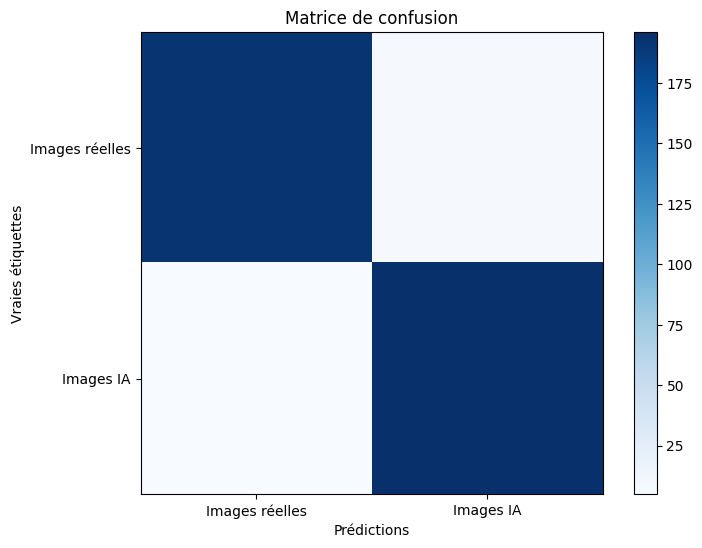

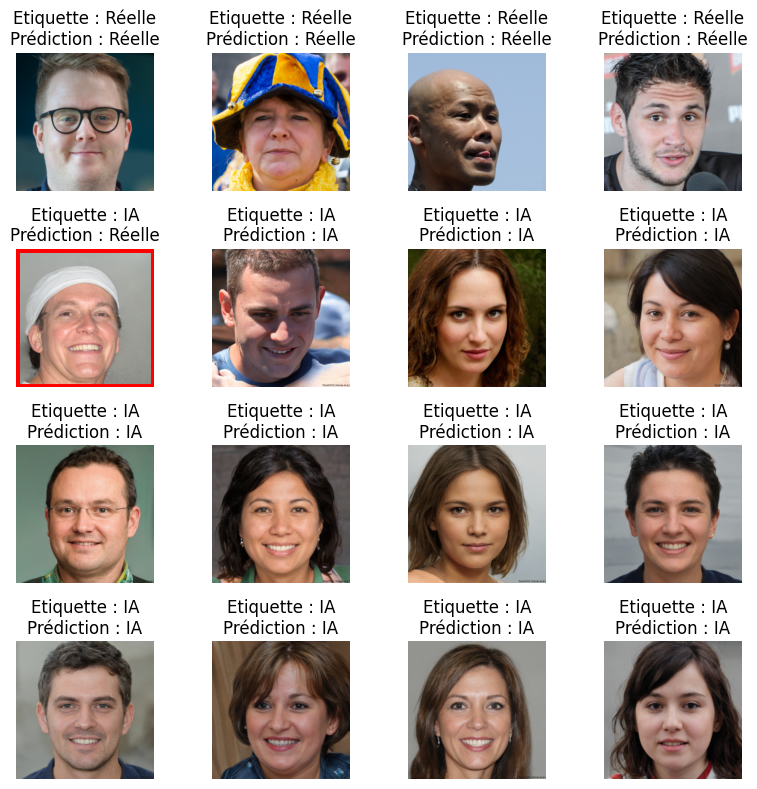

In [65]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import confusion_matrix
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, ["Images réelles", "Images IA"])
plt.yticks(tick_marks, ["Images réelles", "Images IA"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

# Afficher quelques exemples d'images réelles et d'images IA avec leurs prédictions
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
real_indices = np.where(y_test == 0)[0]
ai_indices = np.where(y_test == 1)[0]

for i, ax in enumerate(axes.flat):
    if i < 4:
        index = real_indices[i]
        label = "Réelle"
    else:
        index = ai_indices[i - 4]
        label = "IA"
    
    image = X_test[index].reshape(256, 256, -1)
    prediction = "Réelle" if y_pred[index] == 0 else "IA"
    
    ax.imshow(image)
    ax.set_title(f"Etiquette : {label}\nPrédiction : {prediction}")
    ax.axis("off")

    # Changer la couleur du fond des images mal classifiées
    if (label == "Réelle" and y_pred[index] == 1) or (label == "IA" and y_pred[index] == 0):
        # Create a rectangle and add it to the axes
        rect = patches.Rectangle((0, 0), 256, 256, linewidth=5, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
    
    ax.axis("off")

plt.tight_layout()
plt.show()